In [1]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from fairness.pre_processing import categorical_to_numeric_converter
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [2]:
dataset = pd.read_csv('./dataset/adult/adult.data', sep=',')

In [3]:
dataset = categorical_to_numeric_converter(dataset)

In [4]:
output_column = "income"

In [5]:
X = dataset.iloc[:,:len(dataset.columns) - 2]
y = dataset.loc[:, output_column:]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
standard_scaler_train = StandardScaler()
X_train = standard_scaler_train.fit_transform(X_train)

standard_scaler_test = StandardScaler()
X_test = standard_scaler_test.fit_transform(X_test)

In [8]:
pca = PCA(n_components=0.85)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [9]:
estimator = RandomForestClassifier()

parameters =  {
    'min_samples_leaf': [5, 7, 9, 11],
    'max_depth' : [10, 20, 50, 80, 100, 150],
    'criterion' :['gini', 'entropy']
}

In [10]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring='accuracy', 
    return_train_score=True,
    cv=3
)

In [11]:
grid_search_classifier = grid_search.fit(X_train, y_train)

In [12]:
y_pred = grid_search_classifier.predict(X_test)

In [13]:
print("Accuracy score on Test set: ", accuracy_score(y_test, y_pred))
print("Accuracy score on Train set: ", accuracy_score(y_train, grid_search_classifier.predict(X_train)))
print(classification_report(y_test, y_pred))

Accuracy score on Test set:  0.8198399404429555
Accuracy score on Train set:  0.855649782259913
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      8196
           1       0.65      0.52      0.58      2550

    accuracy                           0.82     10746
   macro avg       0.76      0.72      0.73     10746
weighted avg       0.81      0.82      0.81     10746



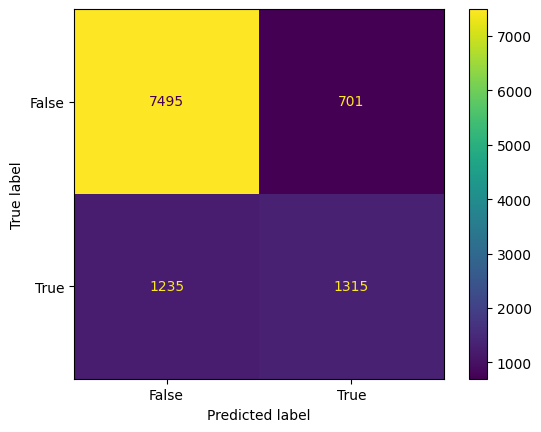

In [14]:
cm_display = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred), display_labels=[False, True])
cm_display.plot()
plt.show()